In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style = 'whitegrid')

import warnings
warnings.filterwarnings('ignore')

# Read xlsx file
df = pd.read_excel('Data_Train.xlsx', sheet_name='Sheet1')

# Save as CSV
df.to_csv('Data_Train.csv', index=False)
df.head(3)

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882


In [5]:
df.info() # Check data types and missing values
df.describe().T # Check summary statistics

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10683 entries, 0 to 10682
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          10683 non-null  object
 1   Date_of_Journey  10683 non-null  object
 2   Source           10683 non-null  object
 3   Destination      10683 non-null  object
 4   Route            10682 non-null  object
 5   Dep_Time         10683 non-null  object
 6   Arrival_Time     10683 non-null  object
 7   Duration         10683 non-null  object
 8   Total_Stops      10682 non-null  object
 9   Additional_Info  10683 non-null  object
 10  Price            10683 non-null  int64 
dtypes: int64(1), object(10)
memory usage: 918.2+ KB


,count,mean,std,min,25%,50%,75%,max
Price,10683.0,9087.064121,4611.359167,1759.0,5277.0,8372.0,12373.0,79512.0


In [6]:
# Convert the 'Date_of_Journey' column to datetime format
df['Date_of_Journey'] = pd.to_datetime(df['Date_of_Journey'], format='%d/%m/%Y')

 # Extract day, month, and year from 'Date_of_Journey' column
df['Journey_Day'] = df['Date_of_Journey'].dt.day
df['Journey_Month'] = df['Date_of_Journey'].dt.month
df['Journey_Year'] = df['Date_of_Journey'].dt.year

 # Extract hours and minutes from 'Dep_Time' column
df['Dep_Hour'] = pd.to_datetime(df['Dep_Time']).dt.hour
df['Dep_Minute'] = pd.to_datetime(df['Dep_Time']).dt.minute

 # Extract hours and minutes from 'Arrival_Time' column
df['Arrival_Hour'] = pd.to_datetime(df['Arrival_Time']).dt.hour
df['Arrival_Minute'] = pd.to_datetime(df['Arrival_Time']).dt.minute

 # Remove the original 'Date_of_Journey', 'Dep_Time', and 'Arrival_Time' columns
df.drop(['Date_of_Journey', 'Dep_Time', 'Arrival_Time'], axis=1, inplace=True)
df.head(3)

,Airline,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Price,Journey_Day,Journey_Month,Journey_Year,Dep_Hour,Dep_Minute,Arrival_Hour,Arrival_Minute
0,IndiGo,Banglore,New Delhi,BLR → DEL,2h 50m,non-stop,No info,3897,24,3,2019,22,20,1,10
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,7h 25m,2 stops,No info,7662,1,5,2019,5,50,13,15
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,19h,2 stops,No info,13882,9,6,2019,9,25,4,25


In [7]:
# Convert 'Duration' column to hours and minutes
duration = list(df['Duration'])
for i in range(len(duration)):
    if len(duration[i].split()) != 2:
        if 'h' in duration[i]:
            duration[i] = duration[i].strip() + ' 0m'
        else:
            duration[i] = '0h ' + duration[i].strip()
duration_hours = []
duration_minutes = []
for i in range(len(duration)):
    duration_hours.append(int(duration[i].split()[0][:-1]))
    duration_minutes.append(int(duration[i].split()[1][:-1]))
df['Duration_Hours'] = duration_hours
df['Duration_Minutes'] = duration_minutes
df.drop('Duration', axis=1, inplace=True)
df.head(3)

,Airline,Source,Destination,Route,Total_Stops,Additional_Info,Price,Journey_Day,Journey_Month,Journey_Year,Dep_Hour,Dep_Minute,Arrival_Hour,Arrival_Minute,Duration_Hours,Duration_Minutes
0,IndiGo,Banglore,New Delhi,BLR → DEL,non-stop,No info,3897,24,3,2019,22,20,1,10,2,50
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,2 stops,No info,7662,1,5,2019,5,50,13,15,7,25
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,2 stops,No info,13882,9,6,2019,9,25,4,25,19,0


### Univariate

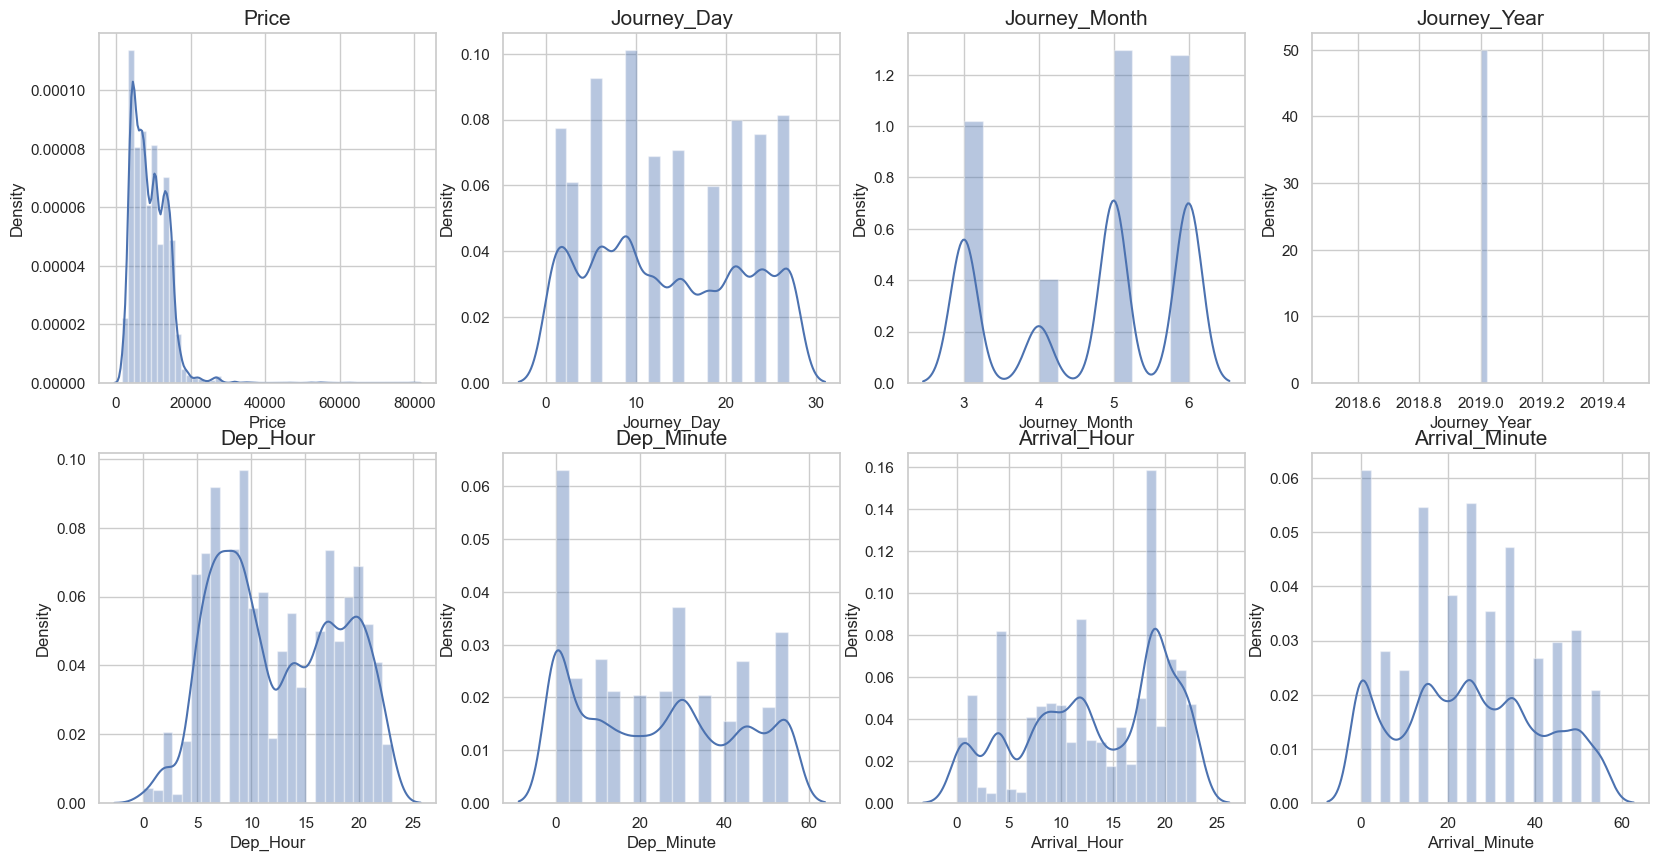

In [8]:
 # Check distribution for numerical features
numerical_features = df[['Price', 'Journey_Day', 'Journey_Month', 'Journey_Year', 'Dep_Hour', 'Dep_Minute', 'Arrival_Hour', 
                      'Arrival_Minute']]

fig, axes = plt.subplots(nrows=2, ncols=4,figsize = (20, 10))
for i, column in enumerate(numerical_features.columns):
    axes[i//4,i%4].set_title(str(column),fontsize=15)
    sns.distplot(numerical_features[column],ax=axes[i//4,i%4])


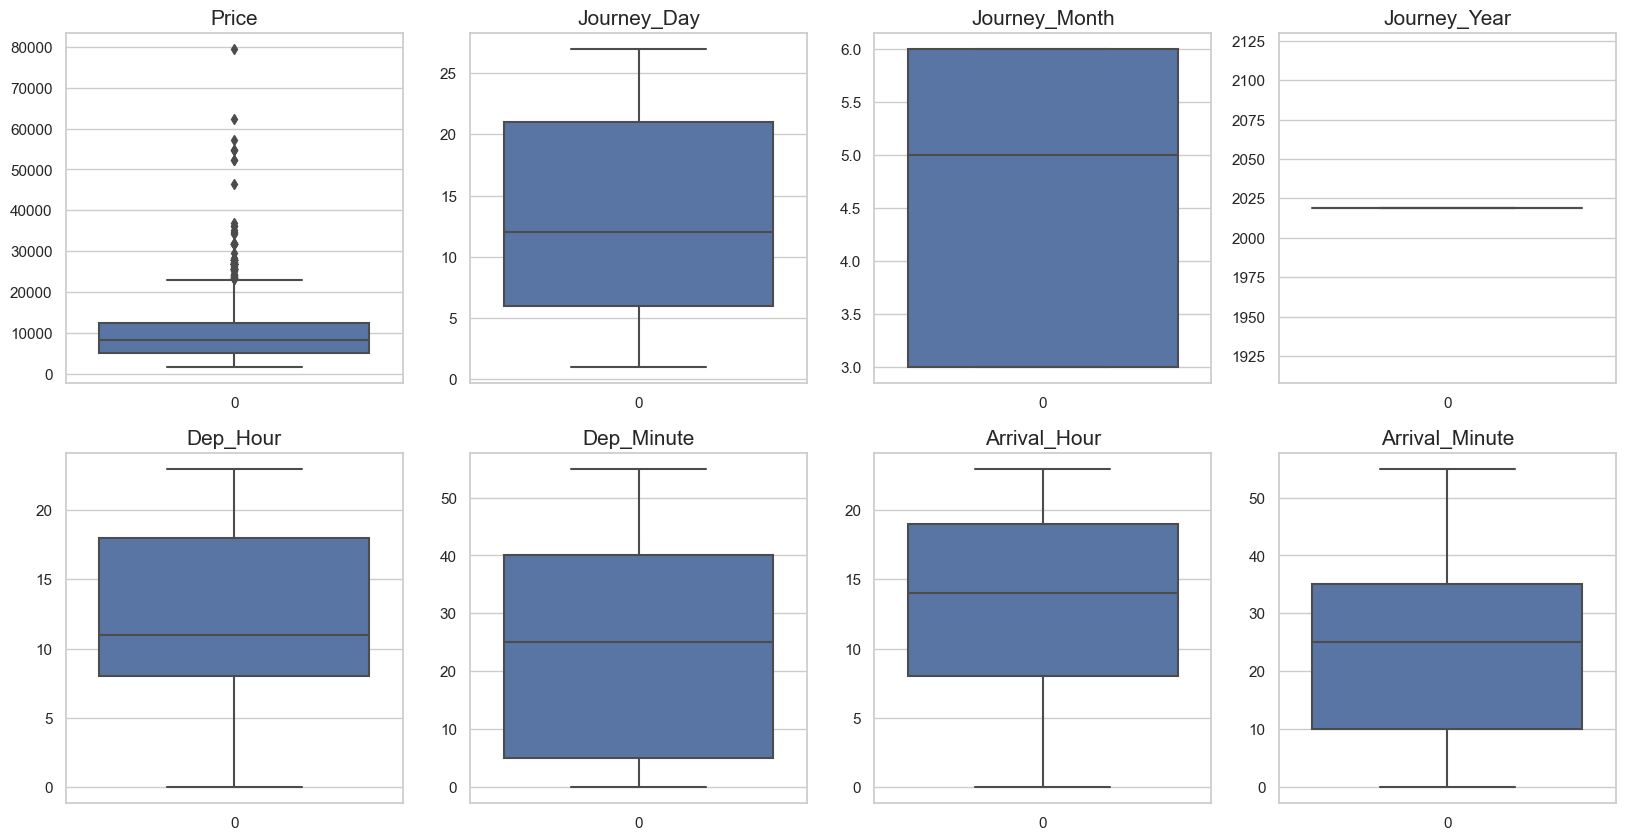

In [9]:
# Univariate Analysis --> Numerical: Outliers Detection
fig, axes = plt.subplots(nrows=2, ncols=4,figsize = (20, 10))
for i, column in enumerate(numerical_features.columns):
    axes[i//4,i%4].set_title(str(column),fontsize=15)
    sns.boxplot(numerical_features[column],ax=axes[i//4,i%4])

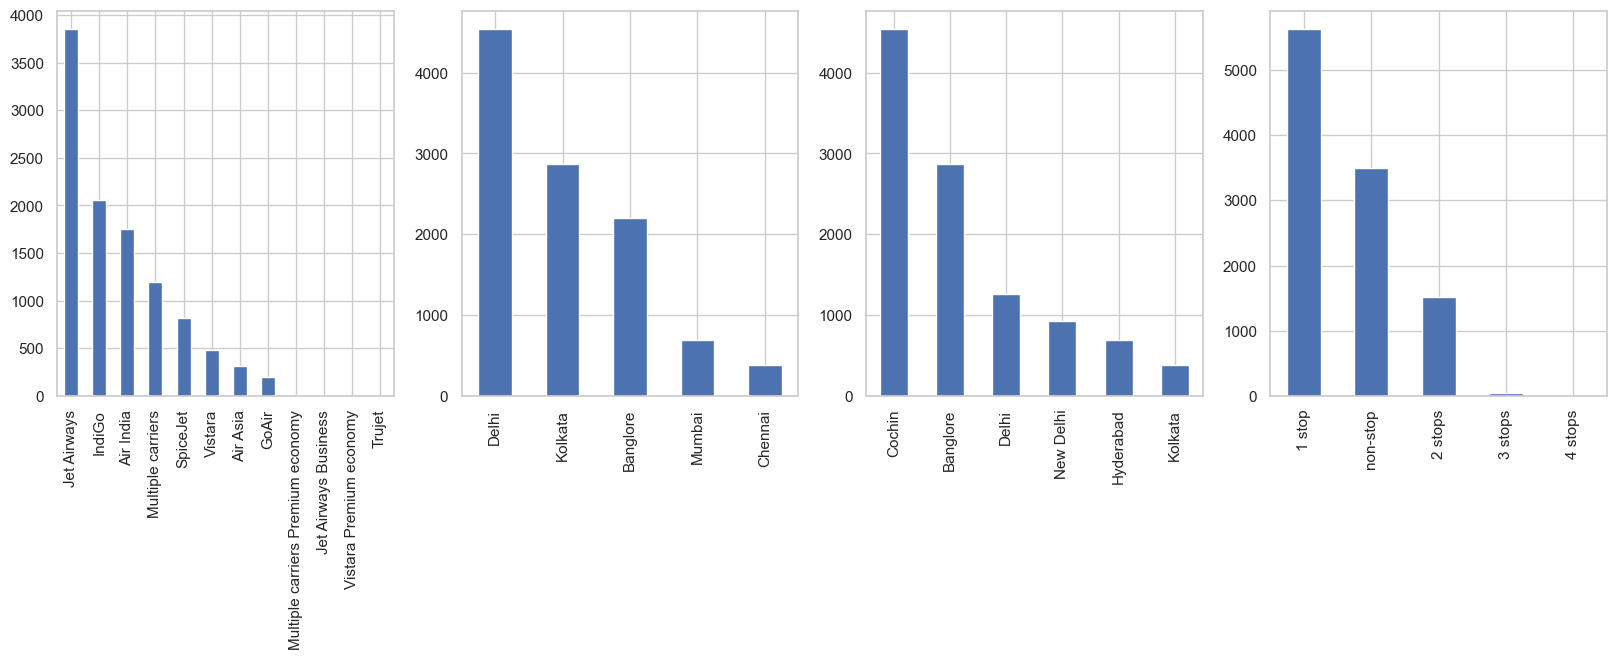

In [10]:
# Check unique values for each categorical feature
categorical_features = df[['Airline', 'Source', 'Destination', 'Total_Stops']]
fig, axes = plt.subplots(nrows=1, ncols=4,figsize = (20, 5))
for index,feature in enumerate(categorical_features.columns):
    df[feature].value_counts().plot(kind='bar',ax= axes[index])

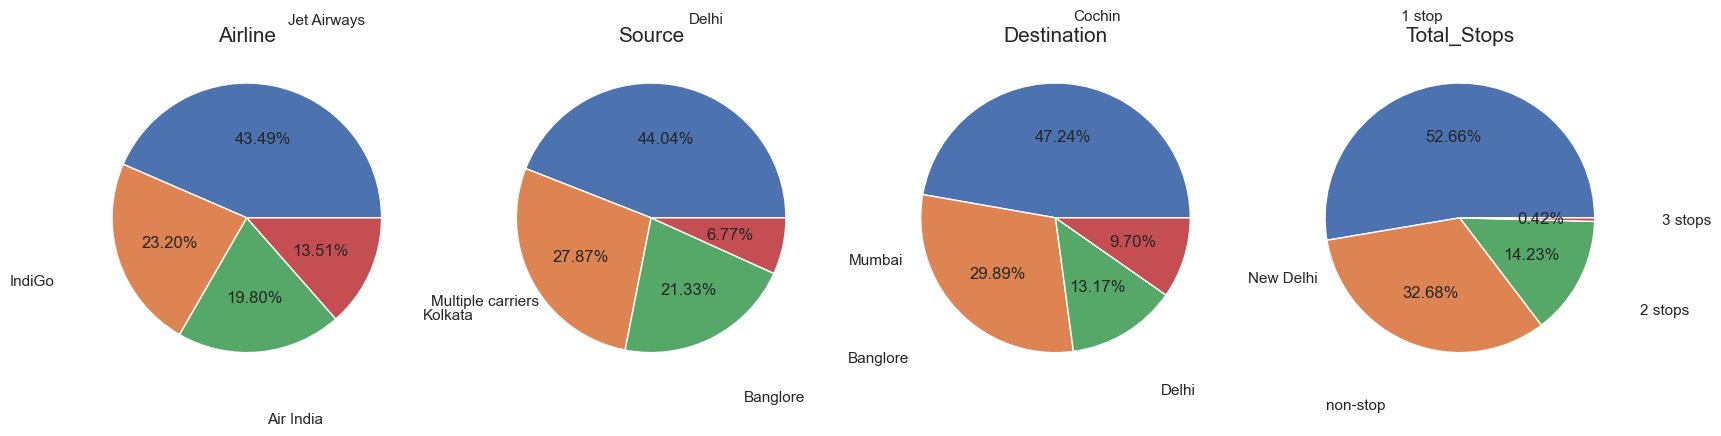

In [11]:
fig, axes = plt.subplots(nrows=1, ncols=4,figsize = (20, 5))
for i, column in enumerate(categorical_features.columns):
    axes[i].set_title(str(column),fontsize=15)
    axes[i].pie(categorical_features[column].value_counts()[:4],
                       labels=list(categorical_features[column].value_counts()[:4].index),
                       autopct ='%1.2f%%' , labeldistance = 1.5,)

### Bivariate/Multivariate Analysis

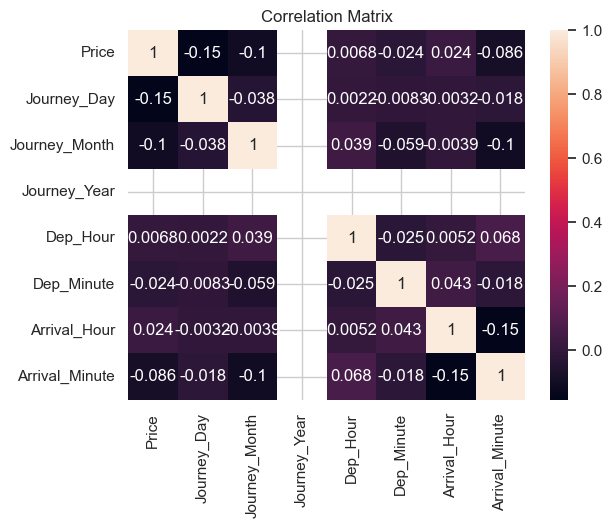

In [12]:
# Check correlation between numerical features
corr_matrix = numerical_features.corr()
sns.heatmap(corr_matrix, annot=True)
plt.title('Correlation Matrix')
plt.show()

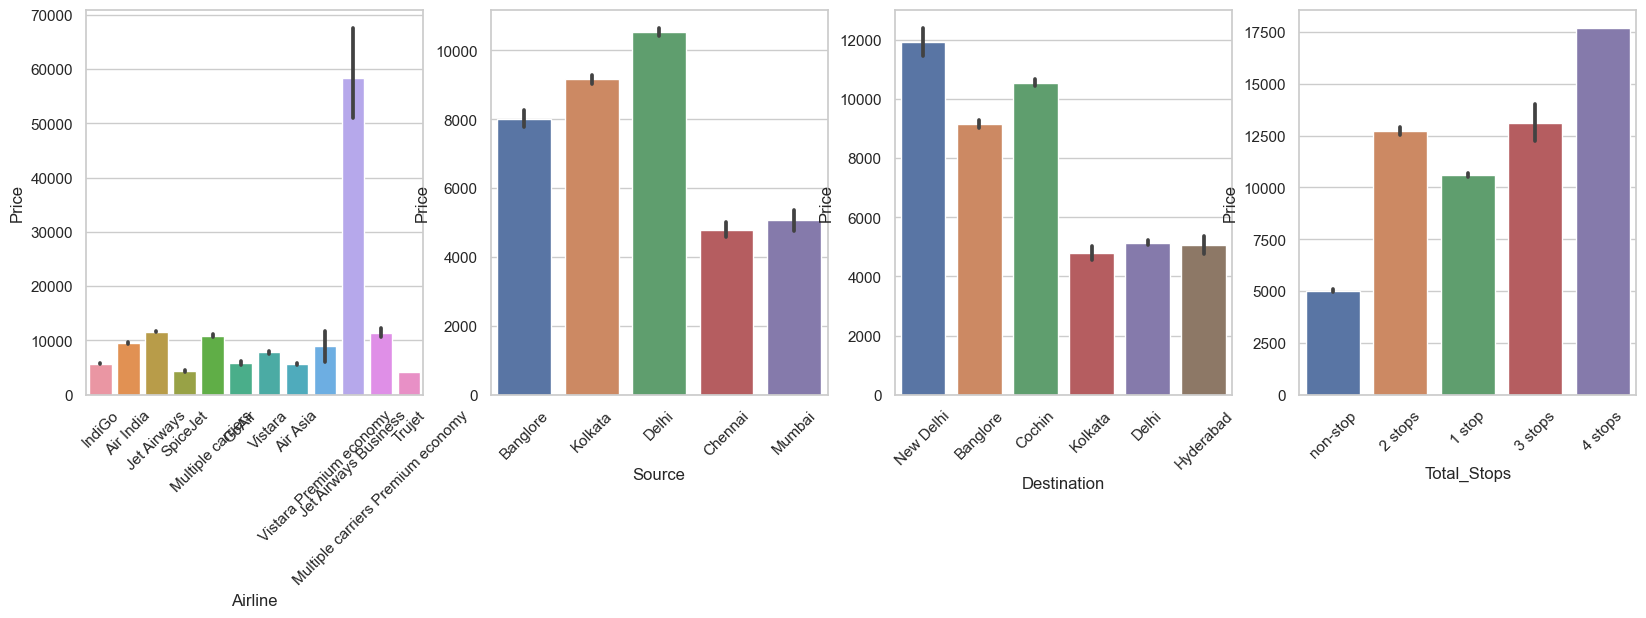

In [13]:
# Check relationship between categorical and numerical features
fig, axes = plt.subplots(nrows=1, ncols=4,figsize = (20, 5))
for i, column in enumerate(categorical_features.columns):
    sns.barplot(x=categorical_features.columns[i], y=numerical_features.columns[0], data=df,ax=axes[i])
    axes[i].set_xticklabels(axes[i].get_xticklabels(), rotation=45)

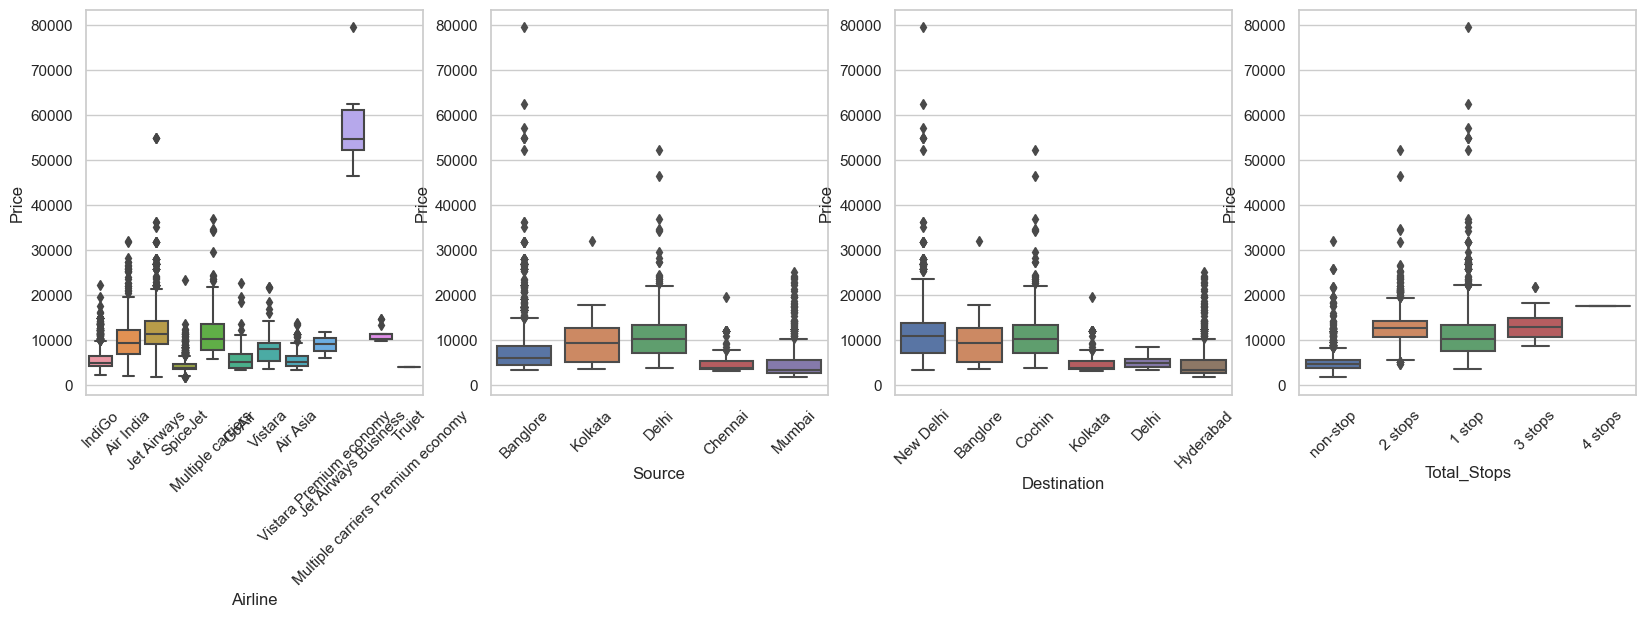

In [14]:

fig, axes = plt.subplots(nrows=1, ncols=4,figsize = (20, 5))
for i, column in enumerate(categorical_features.columns):
    sns.boxplot(x=categorical_features.columns[i], y=numerical_features.columns[0], data=df,ax=axes[i])
    axes[i].set_xticklabels(axes[i].get_xticklabels(), rotation=45)

### Some analysis questions

In [15]:
 # What is the average price of flight tickets?
average_price = df['Price'].mean()
print('Average Price:', average_price)

Average Price: 9087.064120565385


In [16]:
 # What is the most common airline?
most_common_airline = df['Airline'].value_counts().idxmax()
print('Most Common Airline:', most_common_airline)

Most Common Airline: Jet Airways


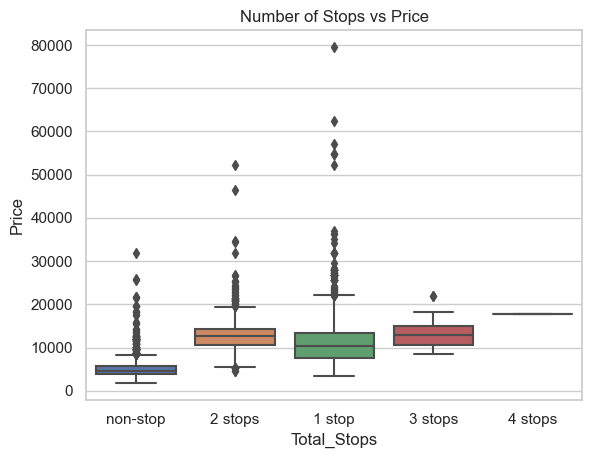

In [17]:
 # What is the relationship between the number of stops and the price of the flight ticket?
sns.boxplot(x='Total_Stops', y='Price', data=df)
plt.title('Number of Stops vs Price')
plt.show()

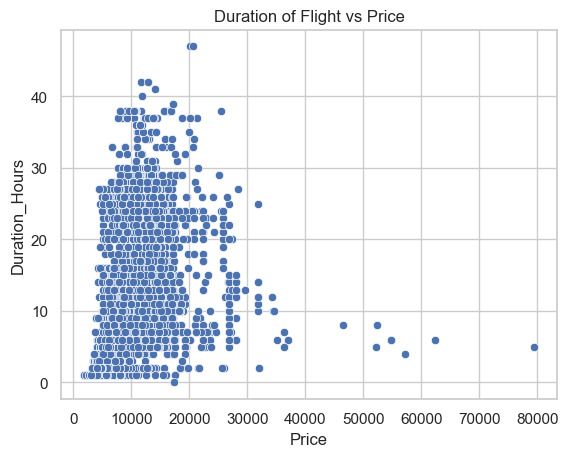

In [18]:
 # What is the relationship between the duration of the flight and the price of the flight ticket?
sns.scatterplot(x='Price', y='Duration_Hours', data=df)
plt.title('Duration of Flight vs Price')
plt.show()

### Preprocessing

In [19]:
df.isnull().sum()

Airline             0
Source              0
Destination         0
Route               1
Total_Stops         1
Additional_Info     0
Price               0
Journey_Day         0
Journey_Month       0
Journey_Year        0
Dep_Hour            0
Dep_Minute          0
Arrival_Hour        0
Arrival_Minute      0
Duration_Hours      0
Duration_Minutes    0
dtype: int64

In [20]:
df.dropna(inplace=True)
df.reset_index(inplace=True)
df.drop(['index'],axis = 1,inplace=True)
df.isnull().sum()

Airline             0
Source              0
Destination         0
Route               0
Total_Stops         0
Additional_Info     0
Price               0
Journey_Day         0
Journey_Month       0
Journey_Year        0
Dep_Hour            0
Dep_Minute          0
Arrival_Hour        0
Arrival_Minute      0
Duration_Hours      0
Duration_Minutes    0
dtype: int64

In [21]:
df.duplicated().sum()

222

In [22]:
df.drop_duplicates(inplace=True)
df.reset_index(inplace=True)
df.drop(['index'],axis = 1,inplace=True)
df.duplicated().sum()

0

In [23]:
df['Additional_Info'].value_counts(),'------',df['Route'].value_counts()

(No info                         8180
 In-flight meal not included     1926
 No check-in baggage included     318
 1 Long layover                    19
 Change airports                    7
 Business class                     4
 No Info                            3
 1 Short layover                    1
 Red-eye flight                     1
 2 Long layover                     1
 Name: Additional_Info, dtype: int64,
 '------',
 DEL → BOM → COK          2376
 BLR → DEL                1534
 CCU → BOM → BLR           979
 CCU → BLR                 724
 BOM → HYD                 621
                          ... 
 CCU → VTZ → BLR             1
 CCU → IXZ → MAA → BLR       1
 BOM → COK → MAA → HYD       1
 BOM → CCU → HYD             1
 BOM → BBI → HYD             1
 Name: Route, Length: 128, dtype: int64)

In [24]:
#split Route 
#df[['Route_1', 'Route_2', 'Route_3', 'Route_4', 'Route_5', 'Route_6']] = df['Route'].str.split('→', expand=True)

# Remove unuseful cols
df.drop(['Route','Additional_Info','Journey_Year','Dep_Minute','Arrival_Minute','Duration_Minutes'], axis=1, inplace=True)
df.head(3)

,Airline,Source,Destination,Total_Stops,Price,Journey_Day,Journey_Month,Dep_Hour,Arrival_Hour,Duration_Hours
0,IndiGo,Banglore,New Delhi,non-stop,3897,24,3,22,1,2
1,Air India,Kolkata,Banglore,2 stops,7662,1,5,5,13,7
2,Jet Airways,Delhi,Cochin,2 stops,13882,9,6,9,4,19


### Model Selection

In [25]:
#sns.boxplot(data=df['Price'])
#pd.cut(df['Price'], bins=[0,5000, 10000, 25000, 40000, float('inf')], labels=['Suber_Cheap','Cheap', 'Normal', 'VIB', 'VIB++'])

In [26]:
x = df.drop("Price" , axis = 1 )
y = df["Price"]
x.head(3)

,Airline,Source,Destination,Total_Stops,Journey_Day,Journey_Month,Dep_Hour,Arrival_Hour,Duration_Hours
0,IndiGo,Banglore,New Delhi,non-stop,24,3,22,1,2
1,Air India,Kolkata,Banglore,2 stops,1,5,5,13,7
2,Jet Airways,Delhi,Cochin,2 stops,9,6,9,4,19


In [27]:
from sklearn.model_selection import train_test_split
# Split the data into train and test sets
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [35]:
from sklearn.pipeline import Pipeline
from sklearn.metrics import r2_score
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet, BayesianRidge, PassiveAggressiveRegressor, OrthogonalMatchingPursuit, HuberRegressor, TheilSenRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor, AdaBoostRegressor
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.neural_network import MLPRegressor
from xgboost import XGBRegressor
from lightgbm import LGBMRegressor
from sklearn.preprocessing import OneHotEncoder

# Select categorical and numerical column names
categorical_cols = ['Airline', 'Source', 'Destination', 'Total_Stops']
numerical_cols = ['Journey_Day', 'Journey_Month', 'Dep_Hour', 'Arrival_Hour', 'Duration_Hours']

# Preprocessing pipeline for categorical features
categorical_transformer = Pipeline([
    ('imputer', SimpleImputer(strategy='most_frequent')),  # Handle missing values with most frequent strategy
    ('encoder', OneHotEncoder())  # One-hot encoding
])

# Preprocessing pipeline for numerical features
numerical_transformer = Pipeline([
    ('imputer', SimpleImputer(strategy='mean')),  # Handle missing values with mean strategy
    ('scaler', StandardScaler())  # Scale numerical features
])

# ColumnTransformer for applying different transformations to different columns
preprocessor = ColumnTransformer([
    ('categorical', categorical_transformer, categorical_cols),
    ('numerical', numerical_transformer, numerical_cols)
])

# Define the regression models
models = [
    ('Linear Regression', LinearRegression()),
    ('Ridge Regression', Ridge()),
    ('Lasso Regression', Lasso()),
    ('ElasticNet Regression', ElasticNet()),
    ('Random Forest Regression', RandomForestRegressor()),
    ('Gradient Boosting Regression', GradientBoostingRegressor()),
    ('AdaBoost Regression', AdaBoostRegressor()),
    ('SVR', SVR()),
    ('Decision Tree Regression', DecisionTreeRegressor()),
    ('K-Nearest Neighbors Regression', KNeighborsRegressor()),
    ('Passive Aggressive Regression', PassiveAggressiveRegressor()),
    ('Huber Regression', HuberRegressor()),
    ('Multi-layer Perceptron Regression', MLPRegressor()),
    ('XGBoost Regression', XGBRegressor()),
    ('LightGBM Regression', LGBMRegressor())
]

# Iterate over the models and calculate regression scores
for model_name, model in models:
    # Complete pipeline with preprocessor and regression model
    pipeline = Pipeline([
        ('preprocessor', preprocessor),
        ('regressor', model)
    ])
        
    # Fit the pipeline to the training data
    pipeline.fit(x_train, y_train)
    
    # Predict on the test data
    y_pred = pipeline.predict(x_test)
    
    # Calculate the regression score (R^2 score)
    score = r2_score(y_test, y_pred)
    
    # Print the regression score for each model
    print(f'{model_name}: R^2 score = {score}')


Linear Regression: R^2 score = 0.5983753025670022
Ridge Regression: R^2 score = 0.5984290350044232
Lasso Regression: R^2 score = 0.5994114906291568
ElasticNet Regression: R^2 score = 0.4610928426553803
Random Forest Regression: R^2 score = 0.7758010307221773
Gradient Boosting Regression: R^2 score = 0.753819395727594
AdaBoost Regression: R^2 score = 0.31242712904337233
SVR: R^2 score = 0.06383298442403473
Decision Tree Regression: R^2 score = 0.647152869153248
K-Nearest Neighbors Regression: R^2 score = 0.7639646572136293
Passive Aggressive Regression: R^2 score = 0.5557521920837725
Huber Regression: R^2 score = 0.5800841682773117
Multi-layer Perceptron Regression: R^2 score = 0.5655456139753128
XGBoost Regression: R^2 score = 0.8256426602987817
LightGBM Regression: R^2 score = 0.8078104097281281


In [200]:
from sklearn.model_selection import GridSearchCV

pipeline = Pipeline([
        ('preprocessor', preprocessor),
        ('regressor', RandomForestRegressor())
    ])

# Define the parameter grid for RandomForestRegressor
param_grid = {
    'regressor__n_estimators': [100, 200, 300],  # Number of trees in the forest
    'regressor__max_depth': [None, 5, 10, 20],  # Maximum depth of the tree
    'regressor__min_samples_split': [2, 5, 10],  # Minimum number of samples required to split an internal node
}

# Create the GridSearchCV object
grid_search = GridSearchCV(pipeline, param_grid, cv=5, scoring='r2')

# Fit the GridSearchCV to the training data
grid_search.fit(x_train, y_train)

# Get the best model and best score
best_model = grid_search.best_estimator_
best_score = grid_search.best_score_

# Predict on the test data using the best model
y_pred = best_model.predict(x_test)

# Calculate the regression score (R^2 score) using the best model
score = r2_score(y_test, y_pred)

# Print the best parameters, best score, and regression score
print("Best Parameters:", grid_search.best_params_)
print("Best Score:", best_score)
print("R^2 Score:", score)


Best Parameters: {'regressor__max_depth': None, 'regressor__min_samples_split': 10, 'regressor__n_estimators': 200}
Best Score: 0.8118427066345101
R^2 Score: 0.8074448117629061


In [42]:
pipeline = Pipeline([
        ('preprocessor', preprocessor),
        ('regressor', XGBRegressor())
    ])

# Define the parameter grid for RandomForestRegressor
param_grid = {
    'regressor__n_estimators': [100, 200, 300],  # Number of boosting rounds
    'regressor__learning_rate': [0.1, 0.01, 0.001],  # Learning rate for each boosting round
    'regressor__max_depth': [3, 5, 7]  # Maximum tree depth
}

# Create the GridSearchCV object
grid_search = GridSearchCV(pipeline, param_grid, cv=5, scoring='r2')

# Fit the GridSearchCV to the training data
grid_search.fit(x_train, y_train)

# Get the best model and best score
best_model = grid_search.best_estimator_
best_score = grid_search.best_score_

# Predict on the test data using the best model
y_pred = best_model.predict(x_test)

# Calculate the regression score (R^2 score) using the best model
score = r2_score(y_test, y_pred)

# Print the best parameters, best score, and regression score
print("Best Parameters:", grid_search.best_params_)
print("Best Score:", best_score)
print("R^2 Score:", score)


Best Parameters: {'regressor__learning_rate': 0.1, 'regressor__max_depth': 5, 'regressor__n_estimators': 300}
Best Score: 0.8299588948170991
R^2 Score: 0.8262414765261207


In [201]:
final_model = grid_search.best_estimator_
final_model

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('categorical',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('encoder',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  ['Airline', 'Source',
                                                   'Destination',
                                                   'Total_Stops']),
                                                 ('numerical',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer()),
                                                                  ('scaler',
                                                                   StandardScaler())]),
                                                  ['Journey_Day',
                                                   'Journey_Month', 'Dep_Hour',
                                                   'Arrival_Hour',
                                                   'Duration_Hours'])])),
                ('regressor',
                 RandomForestRegressor(min_samples_split=10,
                                       n_estimators=200))])

In [202]:
inputs = x.columns
inputs

Index(['Airline', 'Source', 'Destination', 'Total_Stops', 'Journey_Day',
       'Journey_Month', 'Dep_Hour', 'Arrival_Hour', 'Duration_Hours'],
      dtype='object')

In [205]:
import joblib
joblib.dump(final_model , "Model.pkl")
joblib.dump( inputs , "Inputs.pkl" )

['Inputs.pkl']

In [206]:
# Save the DataFrame to a CSV file
x.to_csv('preprocessed_data.csv', index=False)